In [25]:
import pandas as pd
from nfstream import NFStreamer
import os, re, yaml, sys
import numpy as np
sys.path.append(os.path.abspath('/home/mehrdad/PycharmProjects/GAN-Framework'))
from sklearn.model_selection import train_test_split



In [26]:
df = pd.read_csv("/home/mehrdad/PycharmProjects/C2_communication/dataset/combined-benign-malcious/benign_deepred-autoc2-2-3-2025-001.csv").sample(1000)
x = df
X_train, X_test, y_train, y_test = train_test_split(x.loc[:, x.columns != "label"], x.loc[:, x.columns == "label"].values.ravel(),stratify=x.loc[:, x.columns == "label"].values.ravel()
                                                    , test_size=0.2, random_state=42)
print(f" X_train : {X_train.shape} X_test: {X_test.shape} y_tarin: {y_train.shape} y_test {y_test.shape}")
print(f" y_train : Benign {np.count_nonzero(y_train == 0)} Malicous {np.count_nonzero(y_train == 1)} ///  y_test: Benign {np.count_nonzero(y_test == 0)} Malicous: {np.count_nonzero(y_test == 1)}")


 X_train : (800, 78) X_test: (200, 78) y_tarin: (800,) y_test (200,)
 y_train : Benign 710 Malicous 90 ///  y_test: Benign 178 Malicous: 22


In [27]:
df = pd.read_csv("/home/mehrdad/PycharmProjects/C2_communication/dataset/combined-benign-malcious/benign_deepred-autoc2-2-3-2025-001.csv").sample(1000)
x = df
X_train, X_test, y_train, y_test = train_test_split(x.loc[:, x.columns != "label"], x.loc[:, x.columns == "label"].values.ravel(), test_size=0.2, random_state=42)
print(f" X_train : {X_train.shape} X_test: {X_test.shape} y_tarin: {y_train.shape} y_test {y_test.shape}")
print(f" y_train : Benign {np.count_nonzero(y_train == 0)} Malicous {np.count_nonzero(y_train == 1)} ///  y_test: Benign {np.count_nonzero(y_test == 0)} Malicous: {np.count_nonzero(y_test == 1)}")


 X_train : (800, 78) X_test: (200, 78) y_tarin: (800,) y_test (200,)
 y_train : Benign 691 Malicous 109 ///  y_test: Benign 176 Malicous: 24


In [22]:
import pandas as pd
import yaml
import os

def update_yaml_with_df(df, yaml_file, filename):
    # Initialize the dictionary for storing the data
    data = {}

    # Check the shape of the DataFrame (number of columns)
    if df.shape[1] == 1:
        # If there's only one column, store it under the column name in a dictionary format
        column_name = df.columns[0]
        data[filename] = {column_name: df[column_name].tolist()}
    elif df.shape[1] == 2:
        # If there are two columns, store each column separately in a dictionary format
        col1, col2 = df.columns
        data[filename] = {col1: df[col1].tolist(), col2: df[col2].tolist()}

    # Check if the YAML file exists and load it, otherwise create an empty dictionary
    if os.path.exists(yaml_file):
        with open(yaml_file, 'r') as file:
            existing_data = yaml.safe_load(file) or {}
    else:
        existing_data = {}

    # Update the existing data with the new data
    existing_data.update(data)

    # Write the updated data back to the YAML file in the desired format (one-line per entry)
    with open(yaml_file, 'w') as file:
        yaml.dump(existing_data, file, default_flow_style=True, allow_unicode=True)

    print(f"YAML file '{yaml_file}' has been updated with the data from {filename}.")

# Example usage:

# Sample DataFrame with one column
df_single = pd.DataFrame({
    'dst2src_bytes': [44, 28, 26, 34, 34, 33, 33, 30, 28, 35]
})

# Sample DataFrame with two columns
df_double = pd.DataFrame({
    'dst2src_bytes': [44, 28, 26, 34, 34, 33, 33, 30, 28, 35],
    'dst2src_max_ps': [155, 95, 92, 115, 124, 118, 115, 108, 110, 125]
})

# Path to the YAML file
yaml_file = '/home/mehrdad/PycharmProjects/C2_communication/GAN/output.yaml'

# Update the YAML file with data from the DataFrames
update_yaml_with_df(df_single, yaml_file, "config_single_file")
update_yaml_with_df(df_double, yaml_file, "config_double_file")


YAML file '/home/mehrdad/PycharmProjects/C2_communication/GAN/output.yaml' has been updated with the data from config_single_file.
YAML file '/home/mehrdad/PycharmProjects/C2_communication/GAN/output.yaml' has been updated with the data from config_double_file.


In [2]:
def converting_pcap(src_path:str):
    print('Converting ...')
    my_streamer = NFStreamer(source=src_path,
                            # Disable L7 dissection for readability purpose.
                            n_dissections=0,
                            #idle_timeout= 600,
                            #active_timeout= 1800, 
                            accounting_mode= 3, 
                            statistical_analysis=True)
    df = my_streamer.to_pandas(columns_to_anonymize=[])
    print(df.shape)
    print(df.columns)
    print(df['src_ip'].value_counts())
    return(df)
def list_csv_files(folder_path):
    # List all files in the specified folder
    files = os.listdir(folder_path)

    # Filter and return only the CSV files
    csv_files = [file for file in files if file.endswith('.csv')]
    return csv_files
feature =['bidirectional_packets','bidirectional_bytes','bidirectional_min_ps',
                            'bidirectional_mean_ps','bidirectional_stddev_ps', 'bidirectional_max_ps' ,
                            'bidirectional_min_piat_ms','bidirectional_mean_piat_ms',
                            'bidirectional_stddev_piat_ms', 'bidirectional_max_piat_ms', 'bidirectional_syn_packets' ,
                            'bidirectional_cwr_packets', 'bidirectional_ece_packets','bidirectional_urg_packets',
                            'bidirectional_ack_packets', 'bidirectional_psh_packets', 'bidirectional_rst_packets' ,
                            'bidirectional_fin_packets'
                            ,
                            'src2dst_packets', 'src2dst_bytes', 'src2dst_min_ps',
                            'src2dst_mean_ps',
                            'src2dst_stddev_ps', 'src2dst_max_ps', 'src2dst_min_piat_ms',
                            'src2dst_mean_piat_ms',
                            'src2dst_stddev_piat_ms', 'src2dst_max_piat_ms', 'src2dst_syn_packets',
                            'src2dst_cwr_packets', 'src2dst_ece_packets', 'src2dst_urg_packets',
                            'src2dst_ack_packets', 'src2dst_psh_packets', 'src2dst_rst_packets',
                            'src2dst_fin_packets'
                            ,
                            'dst2src_packets', 'dst2src_bytes', 'dst2src_min_ps',
                            'dst2src_mean_ps',
                            'dst2src_stddev_ps', 'dst2src_max_ps', 'dst2src_min_piat_ms',
                            'dst2src_mean_piat_ms',
                            'dst2src_stddev_piat_ms', 'dst2src_max_piat_ms', 'dst2src_syn_packets',
                            'dst2src_cwr_packets', 'dst2src_ece_packets', 'dst2src_urg_packets',
                            'dst2src_ack_packets', 'dst2src_psh_packets', 'dst2src_rst_packets',
                            'dst2src_fin_packets'
                            ]

In [63]:
addr = "/mnt/KN_mhaj/red-team-pcap/"
file_lst = ["darktrace-agents-normal-with_email_10.April.2024.pcap","darktrace-agents-normal-with_email_11.march.2024.pcap",
             "darktrace-agents-normal-with_email_16.April.2024.pcap", "darktrace-agents-normal-with_email_5.march.2024.pcap",
             "5-darktrace-agents-normal-20-11-2023.pcap", "5-darktrace-agents-normal-23-11-2023.pcap"]

In [8]:
df = converting_pcap("/mnt/KN_mhaj/red-team-pcap/deepred-websocket-c2-2025/c2-bot-deepred-2-3-2025-002.pcap")


Converting ...
(2286, 77)
Index(['id', 'expiration_id', 'src_ip', 'src_mac', 'src_oui', 'src_port',
       'dst_ip', 'dst_mac', 'dst_oui', 'dst_port', 'protocol', 'ip_version',
       'vlan_id', 'tunnel_id', 'bidirectional_first_seen_ms',
       'bidirectional_last_seen_ms', 'bidirectional_duration_ms',
       'bidirectional_packets', 'bidirectional_bytes', 'src2dst_first_seen_ms',
       'src2dst_last_seen_ms', 'src2dst_duration_ms', 'src2dst_packets',
       'src2dst_bytes', 'dst2src_first_seen_ms', 'dst2src_last_seen_ms',
       'dst2src_duration_ms', 'dst2src_packets', 'dst2src_bytes',
       'bidirectional_min_ps', 'bidirectional_mean_ps',
       'bidirectional_stddev_ps', 'bidirectional_max_ps', 'src2dst_min_ps',
       'src2dst_mean_ps', 'src2dst_stddev_ps', 'src2dst_max_ps',
       'dst2src_min_ps', 'dst2src_mean_ps', 'dst2src_stddev_ps',
       'dst2src_max_ps', 'bidirectional_min_piat_ms',
       'bidirectional_mean_piat_ms', 'bidirectional_stddev_piat_ms',
       'bidirectio

In [ ]:
#df.to_csv(f"/home/mehrdad/PycharmProjects/C2_communication/dataset/deepred-auto-c2/combined/deepred_autoc2_labeled_1-3-2025-001.csv",  index=False)

In [9]:
#df[df["dst_port"]!= 5000].value_counts().sum()
df["label"] = 0
df.loc[df["dst_port"]== 5000, "label"]=1

In [10]:
df["attack"] = "DeepRed auto-c2"

In [15]:
df.to_csv(f"/home/mehrdad/PycharmProjects/C2_communication/dataset/deepred-auto-c2/c2-bot-deepred-2-3-2025-002.csv",  index=False)

In [48]:
print(list_csv_files("/home/mehrdad/PycharmProjects/C2_communication/dataset/2025/"))
print( os.listdir("/home/mehrdad/PycharmProjects/C2_communication/dataset/2025/"))

None
['c2-bot-deepred-28-2-2025-002.csv', 'c2-bot-deepred-28-2-2025.csv', 'c2-bot-deepred-27-2-2025.csv', 'c2-bot-deepred-28-2-2025-001.csv', 'c2-bot-deepred-1-3-2025-000.csv', 'c2-bot-deepred-28-2-2025-004.csv', 'readme.txt']


In [67]:
csv_lst = list_csv_files("/home/mehrdad/PycharmProjects/C2_communication/dataset/benign/")
s = 0
ds = []
for csv in csv_lst:
    df= pd.read_csv("/home/mehrdad/PycharmProjects/C2_communication/dataset/benign/" +csv)
    print(f"File: {csv} shape: {df.shape}")
    ds.append(df)

combined = pd.concat(ds, axis=0)

File: darktrace-agents-normal-with_email_16.April.2024.csv shape: (35359, 77)
File: 5-darktrace-agents-normal-23-11-2023.csv shape: (44379, 77)
File: darktrace-agents-normal-with_email_11.march.2024.csv shape: (30898, 77)
File: 5-darktrace-agents-normal-20-11-2023.csv shape: (39355, 77)
File: darktrace-agents-normal-with_email_5.march.2024.csv shape: (44439, 77)
File: darktrace-agents-normal-with_email_10.April.2024.csv shape: (10193, 77)


In [70]:
#combined["src_ip"].value_counts()
combined['label']= 0
combined['attack'] = "benign"
combined.to_csv("/home/mehrdad/PycharmProjects/C2_communication/dataset/benign/combined_benign_1-3-2025.csv", index=False)


In [16]:
b = pd.read_csv("/home/mehrdad/PycharmProjects/C2_communication/dataset/combined-benign-malcious/benign_deepred-autoc2-2-3-2025.csv")
m = pd.read_csv("/home/mehrdad/PycharmProjects/C2_communication/dataset/deepred-auto-c2/c2-bot-deepred-2-3-2025-001.csv")
mm = pd.read_csv("/home/mehrdad/PycharmProjects/C2_communication/dataset/deepred-auto-c2/c2-bot-deepred-2-3-2025-002.csv")

a = []
a.append(b)
a.append(m)
a.append(mm)

df = pd.concat(a, axis=0).sample(frac=1)

print(df.shape,df["label"].value_counts())

df.to_csv("/home/mehrdad/PycharmProjects/C2_communication/dataset/combined-benign-malcious/benign_deepred-autoc2-2-3-2025-001.csv",index=False)

(231516, 79) label
0    204658
1     26858
Name: count, dtype: int64


In [36]:
import numpy as np

# Creating the 2D array
array_2d = np.array([[66.54567, 76.29591],
                     [69.222984, 91.13275],
                     [75.40423, 97.87395],
                     [69.54005, 82.37642],
                     [74.13337, 93.32363],
                     [66.32373, 80.662125],
                     [74.05637, 90.54689],
                     [82.742966, 104.40181]])

# Calculating the mean of each column
mean_column_1 = np.mean(array_2d[:, 0])
mean_column_2 = np.mean(array_2d[:, 1])

# Printing the means
print("Mean of Column 1:", mean_column_1)
print("Mean of Column 2:", mean_column_2)


Mean of Column 1: 72.24617125
Mean of Column 2: 89.576685625


In [ ]:
b = ([5.9803128e-06],
 [7.2192784e-06],
 [3.8877144e-05],
 [2.3736484e-06],
 [1.4378369e-08],
 [1.8284362e-06],
 [1.8894058e-05],
 [8.0419471e-07],
 [1.9639795e-07],
 [8.2813204e-07])
#b = np.random.random(10)

# This is the outer loop
while True:
    print("Starting the loop from the beginning.")
    
    # This is the inner loop (same as your for loop in original question)
    for i in range(10):
        print(f"  Iteration {i + 1} of the loop")
        
        # Check if the condition is met
        if np.mean(b) < 0.01:
            print("  Condition met! Restarting the loop.")
            #b = np.random.random(10)  # Reset `b` or other variables
            break  # Break the inner loop to start again from the beginning
        else:
            # Continue with the normal processing if condition isn't met
            print("  Condition not met. Continuing...")
            # Update b or perform your regular logic here

    else:
        # If the inner loop completes without breaking, exit the loop
        print("  Loop completed without restart condition met.")
        break

In [46]:
feature = [ 'src2dst_packets','src2dst_bytes','dst2src_packets','dst2src_bytes','src2dst_max_ps','dst2src_max_ps', 'label']
df= pd.read_csv("/home/mehrdad/PycharmProjects/C2_communication/dataset/combined-benign-malcious/benign_deepred-autoc2-2-3-2025.csv").loc[:,feature]

                 src2dst_packets  src2dst_bytes  dst2src_packets  \
src2dst_packets         1.000000       0.466111         0.913030   
src2dst_bytes           0.466111       1.000000         0.363342   
dst2src_packets         0.913030       0.363342         1.000000   
dst2src_bytes           0.869668       0.238524         0.842937   
src2dst_max_ps          0.165314       0.319071         0.107014   
dst2src_max_ps          0.393105       0.052099         0.200098   

                 dst2src_bytes  src2dst_max_ps  dst2src_max_ps  
src2dst_packets       0.869668        0.165314        0.393105  
src2dst_bytes         0.238524        0.319071        0.052099  
dst2src_packets       0.842937        0.107014        0.200098  
dst2src_bytes         1.000000        0.079041        0.491899  
src2dst_max_ps        0.079041        1.000000        0.199337  
dst2src_max_ps        0.491899        0.199337        1.000000  


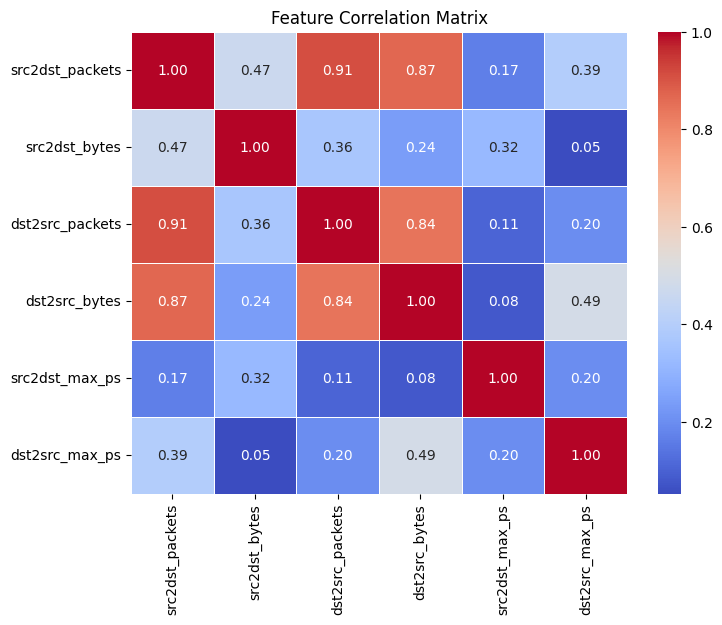

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

benign = df[df["label"]==0]
correlation_matrix = benign.loc[:, benign.columns != "label"].corr()
print(correlation_matrix)
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title for the heatmap
plt.title("Feature Correlation Matrix")

# Show the plot
plt.show()


In [53]:
import yaml
with open("/home/mehrdad/PycharmProjects/C2_communication/GAN/gan_config.yaml", "r") as file:
    config = yaml.safe_load(file)
for item in config["adversarial_features"]:
    print(item)

['src2dst_packets']
['src2dst_bytes']
['dst2src_packets']
['dst2src_bytes']
['src2dst_max_ps']
['dst2src_max_ps']
['src2dst_packets', 'src2dst_bytes']
['src2dst_packets', 'src2dst_max_ps']
['src2dst_packets', 'dst2src_max_ps']
['src2dst_bytes', 'dst2src_packets']
['src2dst_bytes', 'dst2src_bytes']
['src2dst_bytes', 'src2dst_max_ps']
['src2dst_bytes', 'dst2src_max_ps']
['dst2src_packets', 'src2dst_max_ps']
['dst2src_packets', 'dst2src_max_ps']
['dst2src_bytes', 'src2dst_max_ps']
['dst2src__bytes', 'dst2src_min_ps']
['dst2src_bytes', 'dst2src_max_ps']


In [57]:
b = np.array(([5.9803128e-06],
 [7.2192784e-06],
 [3.8877144e-05],
 [2.3736484e-06],
 [1.4378369e-08],
 [1.8284362e-06],
 [1.8894058e-05],
 [8.0419471e-07],
 [1.9639795e-07],
 [8.2813204e-07]))
b.shape

(10, 1)